In [121]:
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
class CFG:
    SEED = 42

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

## 데이터 불러오기

In [28]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## 데이터 살펴보기

        train.csv [파일]
        id : 개체 고유 ID
        개체정보
            father : 개체의 가계 고유 번호 (0 : Unknown)
            mother : 개체의 모계 고유 번호 (0 : Unknown)
            gender : 개체 성별 (0 : Unknown, 1 : female, 2 : male)
            trait : 개체 표현형 정보 
        15개의 SNP 정보 : SNP_01 ~ SNP_15
        class : 개체의 품종 (A,B,C)


        test.csv [파일]
        id : 개체 샘플 별 고유 ID
        개체정보
            father : 개체의 가계 고유 번호 (0 : Unknown)
            mother : 개체의 모계 고유 번호 (0 : Unknown)
            gender : 개체 성별 (0 : Unknown, 1 : female, 2 : male)
            trait : 개체 표현형 정보 
        15개의 SNP 정보 : SNP_01 ~ SNP_15

In [5]:
train.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [6]:
train.iloc[0]

id        TRAIN_000
father            0
mother            0
gender            0
trait             2
SNP_01          G G
SNP_02          A G
SNP_03          A A
SNP_04          G A
SNP_05          C A
SNP_06          A A
SNP_07          A A
SNP_08          G G
SNP_09          A A
SNP_10          G G
SNP_11          A G
SNP_12          A A
SNP_13          A A
SNP_14          A A
SNP_15          A A
class             B
Name: 0, dtype: object

In [29]:
train.shape

(262, 21)

In [7]:
train.info()  # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB


In [8]:
print(train['father'].unique())
print(train['mother'].unique())
print(train['gender'].unique())
print(train['trait'].unique())

[0]
[0]
[0]
[2 1]


- father, mother, gender는 0값 unknown 즉 결측치이므로 열 삭제 (train과 test 모두)
- trait는 1, 2가 존재함을 알 수 있음

In [9]:
print('SNP_01 : ', train['SNP_01'].unique())
print('SNP_02 : ', train['SNP_02'].unique())
print('SNP_03 : ', train['SNP_03'].unique())
print('SNP_04 : ', train['SNP_04'].unique())
print('SNP_05 : ', train['SNP_05'].unique())
print('SNP_06 : ', train['SNP_06'].unique())
print('SNP_07 : ', train['SNP_07'].unique())
print('SNP_08 : ', train['SNP_08'].unique())
print('SNP_09 : ', train['SNP_09'].unique())
print('SNP_10 : ', train['SNP_10'].unique())
print('SNP_11 : ', train['SNP_11'].unique())
print('SNP_12 : ', train['SNP_12'].unique())
print('SNP_13 : ', train['SNP_13'].unique())
print('SNP_14 : ', train['SNP_14'].unique())
print('SNP_15 : ', train['SNP_15'].unique())

SNP_01 :  ['G G' 'A G' 'A A']
SNP_02 :  ['A G' 'G G' 'A A']
SNP_03 :  ['A A' 'C A' 'C C']
SNP_04 :  ['G A' 'A A' 'G G']
SNP_05 :  ['C A' 'A A' 'C C']
SNP_06 :  ['A A' 'A G' 'G G']
SNP_07 :  ['A A' 'G G' 'G A']
SNP_08 :  ['G G' 'G A' 'A A']
SNP_09 :  ['A A' 'G A' 'G G']
SNP_10 :  ['G G' 'A G' 'A A']
SNP_11 :  ['A G' 'A A' 'G G']
SNP_12 :  ['A A' 'G A' 'G G']
SNP_13 :  ['A A' 'G G' 'A G']
SNP_14 :  ['A A' 'C C' 'C A']
SNP_15 :  ['A A' 'G G' 'G A']


- SNP 정보는 encoding이 필요함

In [12]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [13]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

- 불필요한 정보인 id 컬럼 삭제

## 데이터 인코딩
### Label-Encoding

In [31]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [35]:
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

In [41]:
len(snp_data)

3930

In [45]:
print(train_x.select_dtypes('object').shape)
print(train_x.select_dtypes('object').shape[0] * train_x.select_dtypes('object').shape[1])

(262, 15)
3930


In [48]:
train_y.unique()

array(['B', 'C', 'A'], dtype=object)

In [50]:
train_y = class_le.fit_transform(train_y)
train_y

array([1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0,
       1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1],
      dtype=int64)

In [51]:
snp_le.fit(snp_data)

LabelEncoder()

In [52]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

In [55]:
train_x.head()

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,2,5,1,0,4,2,0,0,5,0,5,1,0,0,0,0
1,0,0,0,2,1,1,2,0,0,1,0,4,0,1,0,4,5,0,0
2,0,0,0,2,5,5,0,4,3,5,0,4,4,1,0,0,0,0,0
3,0,0,0,1,0,5,0,4,0,5,5,0,5,1,5,5,5,0,5
4,0,0,0,2,5,5,3,0,3,0,0,0,0,5,0,0,1,0,4


In [56]:
test_x.head()

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,1,1,5,0,4,0,1,5,4,4,1,1,4,5,2,4
1,0,0,0,2,5,1,3,5,3,0,0,0,0,5,1,0,0,0,0
2,0,0,0,2,5,1,0,0,2,1,0,0,0,1,0,4,5,0,5
3,0,0,0,2,5,1,2,0,3,0,0,0,0,5,0,4,1,0,0
4,0,0,0,1,0,5,0,5,0,5,5,0,5,1,5,4,5,0,5


## 변수 선택

In [66]:
drop_col = ['father', 'mother', 'gender']
train_x = train_x.drop(drop_col, axis = 1)
test_x = test_x.drop(drop_col, axis = 1)

In [75]:
train_x.corr() >= 0.7

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
trait,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
SNP_01,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
SNP_02,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
SNP_03,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
SNP_04,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
SNP_05,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
SNP_06,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
SNP_07,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
SNP_08,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
SNP_09,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


- 다중공선성 존재 X -> 모든 변수 사용

## train set과 validation set split

In [81]:
train_x.shape, train_y.shape

((262, 16), (262,))

In [112]:
train_x.to_numpy()

array([[2, 5, 1, ..., 0, 0, 0],
       [2, 1, 1, ..., 5, 0, 0],
       [2, 5, 5, ..., 0, 0, 0],
       ...,
       [1, 1, 5, ..., 5, 2, 5],
       [1, 0, 5, ..., 5, 2, 5],
       [2, 5, 1, ..., 5, 0, 4]], dtype=int64)

In [115]:
xtrain, xval, ytrain, yval = train_test_split(train_x, train['class'], test_size = 0.2 , stratify = train['class'])

In [118]:
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((209, 16), (53, 16), (209,), (53,))

## 단일 모델

### 1. Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dt = DecisionTreeClassifier(random_state=CFG.SEED)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

In [137]:
dt_preds = dt.predict(xval)

In [138]:
f1_score(yval, dt_preds, average = 'macro')

0.8885714285714287

### 2.  SVC

In [133]:
from sklearn.svm import SVC

In [145]:
kernel_list = ['rbf', 'poly', 'sigmoid']
 
for kernel in kernel_list:
    svc = SVC(kernel=kernel, random_state = CFG.SEED)
    svc.fit(xtrain, ytrain) 
    svc_preds = svc.predict(xval)
    print("svc (", kernel, ") : ", f1_score(yval, svc_preds, average = 'macro'))

svc ( rbf ) :  0.9451090781140042
svc ( poly ) :  0.9474747474747475
svc ( sigmoid ) :  0.7503383060242929


- svc 중에서는 'poly' 커널을 사용했을 때 성능이 가장 좋음

### 3. KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [163]:
knn_acc = np.zeros(10)
for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(xtrain, ytrain)
    knn_preds = knn.predict(xval)
    knn_acc[n - 1] = accuracy_score(yval, knn_preds)
    print("n =", n, ": ", knn_acc[n - 1])

n = 1 :  0.8679245283018868
n = 2 :  0.8867924528301887
n = 3 :  0.8679245283018868
n = 4 :  0.8679245283018868
n = 5 :  0.8867924528301887
n = 6 :  0.9056603773584906
n = 7 :  0.8867924528301887
n = 8 :  0.8867924528301887
n = 9 :  0.8867924528301887
n = 10 :  0.9056603773584906


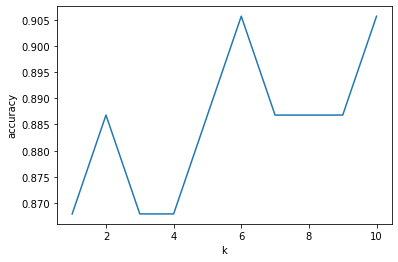

In [164]:
plt.plot(range(1, 11), knn_acc)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

- k = 6으로 설정

In [173]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=6)

In [174]:
knn_preds = knn.predict(xval)

In [175]:
f1_score(yval, knn_preds, average = 'macro')

0.90559186637618

## Random Forest

In [125]:
rf = RandomForestClassifier(random_state=CFG.SEED)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [126]:
rf_preds = rf.predict(xval)

In [127]:
f1_score(yval, rf_preds, average = 'macro')

0.9451090781140042

## AdaBoost Classifier

### base estimator : decision tree

In [180]:
from sklearn.ensemble import AdaBoostClassifier

In [234]:
ada = AdaBoostClassifier(base_estimator = dt, random_state=CFG.SEED)
ada.fit(xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

In [235]:
ada_preds = ada.predict(xval)

In [236]:
f1_score(yval, ada_preds, average = 'macro')

0.8719211822660098

## Gradient Boosting Classifier

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

In [193]:
gbc = GradientBoostingClassifier(random_state=CFG.SEED)
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=42)

In [194]:
gbc_preds = gbc.predict(xval)

In [195]:
f1_score(yval, gbc_preds, average = 'macro')

0.9638888888888889

## XGBoost Classifier

In [197]:
from xgboost import XGBClassifier

In [210]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain_le = le.fit_transform(ytrain)
yval_le = le.fit_transform(yval)

In [211]:
xgb = XGBClassifier(random_state=CFG.SEED)
xgb.fit(xtrain, ytrain_le)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [212]:
xgb_preds = xgb.predict(xval)

In [214]:
f1_score(yval_le, xgb_preds, average = 'macro')

0.9085151301900071

## Light GBM

In [216]:
from lightgbm import LGBMClassifier

In [218]:
lgbm = LGBMClassifier(random_state=CFG.SEED)
lgbm.fit(xtrain, ytrain)

LGBMClassifier(random_state=42)

In [219]:
lgbm_preds = lgbm.predict(xval)

In [220]:
f1_score(yval, lgbm_preds, average = 'macro')

0.9646739130434782

## Bagging Classifier

### base estimator : decision tree

In [221]:
from sklearn.ensemble import BaggingClassifier

In [226]:
bag = BaggingClassifier(base_estimator = dt, random_state=CFG.SEED)
bag.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [227]:
bag_preds = bag.predict(xval)

In [228]:
f1_score(yval, bag_preds, average = 'macro')

0.8885714285714287

## Final Model : LightGBM

In [237]:
lgbm_final = LGBMClassifier(random_state=CFG.SEED)
lgbm_final.fit(train_x, train_y)

LGBMClassifier(random_state=42)

In [238]:
preds = lgbm_final.predict(test_x)

## Submission

In [239]:
submit = pd.read_csv('./sample_submission.csv')

In [251]:
submit['class']

0      0
1      1
2      2
3      1
4      0
      ..
170    1
171    2
172    2
173    1
174    1
Name: class, Length: 175, dtype: int32

In [253]:
for idx, pred in enumerate(preds):
    if pred == 0:
        submit['class'][idx] = 'A'
    elif pred == 1:
        submit['class'][idx] = 'B'
    else:
        submit['class'][idx] = 'C'

C:\Users\조\AppData\Local\Temp\ipykernel_26840\2216335007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['class'][idx] = 'A'


In [242]:
submit

,id,class
0,TEST_000,0
1,TEST_001,1
2,TEST_002,2
3,TEST_003,1
4,TEST_004,0
...,...,...
170,TEST_170,1
171,TEST_171,2
172,TEST_172,2
173,TEST_173,1


In [257]:
submit.to_csv('./answer/submit.csv', index=False)